In [0]:
import numpy as np
from sklearn.svm import SVC
import os
import random
from pathlib import Path
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Dense,GlobalAveragePooling2D,Flatten,Activation,Dropout,AveragePooling2D
from keras.models import Model
from keras.applications.resnet50 import ResNet50

# Data Preparation

In [0]:
from google.colab import drive
drive.mount('/colab')

Drive already mounted at /colab; to attempt to forcibly remount, call drive.mount("/colab", force_remount=True).


In [0]:
print(os.listdir('/colab/My Drive/colab/Images'))

['humans', 'cats', 'dogs', 'horses']


In [0]:
pd = Path('/colab/My Drive/colab/Images/')

dirs = pd.glob('*')

classes_dict = {}
num_name = {}
image_data = []
image_labels = []
count = 0 

for folder_name in dirs:
    print(folder_name)
    name = str(folder_name).split('/')[-1]
    classes_dict[name] = count
    num_name[count] = name
    count+=1
    
    for img in folder_name.glob('*.jpg'):
        data = image.load_img(img,target_size=(224,224))
        img_array = image.img_to_array(data)
        print(len(image_data),end=' ')
        image_data.append(img_array)
        image_labels.append(classes_dict[name])


/colab/My Drive/colab/Images/humans
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 /colab/My Drive/colab/Images/cats
202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 

In [0]:
print(len(image_labels),len(image_data))
image_data = np.array(image_data,dtype='float32')/255.0
image_labels = np.array(image_labels)
print(image_data.shape,image_labels.shape)

808 808
(808, 224, 224, 3) (808,)


In [0]:
print(classes_dict)

{'humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}


# shuffling data

In [0]:
import random 

combined = list(zip(image_data,image_labels))
random.shuffle(combined)

image_data[:],image_labels[:] = zip(*combined)
image_labels = np_utils.to_categorical(image_labels)
print(image_data.shape,image_labels.shape)

(808, 224, 224, 3) (808, 4)


# Visualization

In [0]:
def visualize(img):
    plt.imshow(img)
    plt.show()

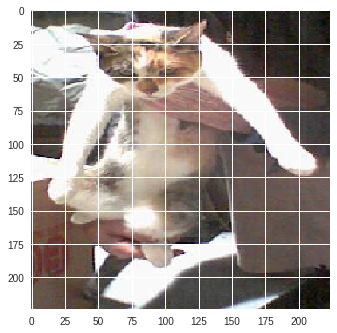

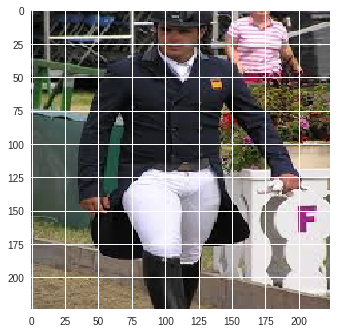

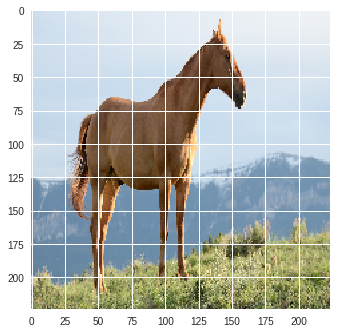

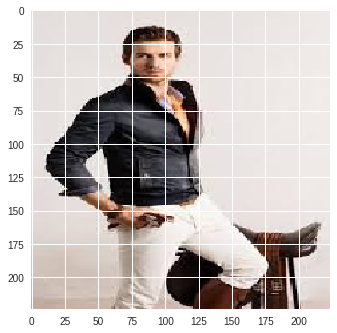

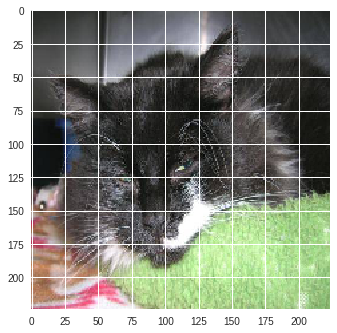

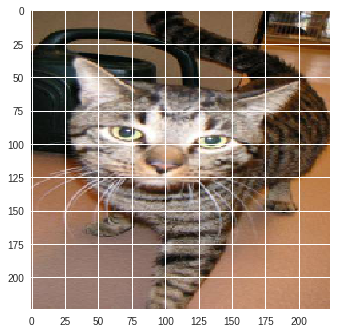

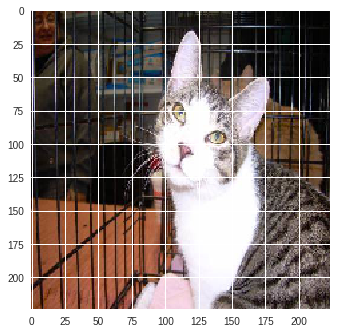

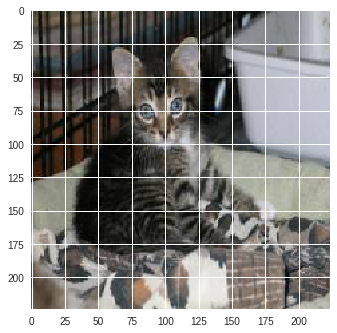

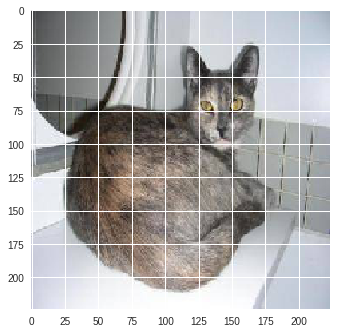

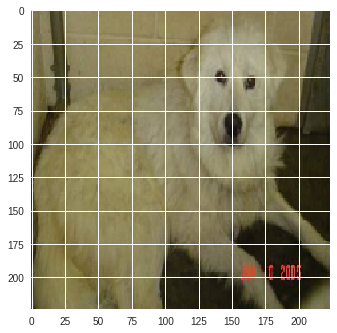

In [0]:
for ix in image_data[:10,:]:
    visualize(ix)

In [0]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
av1 = AveragePooling2D((7,7))(model.output)
av2 = GlobalAveragePooling2D()(av1)
fc1 = Dense(256,activation='relu')(av2)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f21aab4afd0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f21aab4a668>
2 <keras.layers.convolutional.Conv2D object at 0x7f21aab4a8d0>
3 <keras.layers.normalization.BatchNormalization object at 0x7f21aab4a5c0>
4 <keras.layers.core.Activation object at 0x7f21aab4acf8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f21aa9e9d30>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f21aa9e9e48>
7 <keras.layers.convolutional.Conv2D object at 0x7f21aa998dd8>
8 <keras.layers.normalization.BatchNormalization object at 0x7f21aa91ecc0>
9 <keras.layers.core.Activation object at 0x7f21aa91ef60>
10 <keras.layers.convolutional.Conv2D object at 0x7f21aa945da0>
11 <keras.layers.normalization.BatchNormalization object at 0x7f21aa8f51d0>
12 <keras.layers.core.Activation object at 0x7f21aa8b82b0>
13 <keras.layers.convolutional.Conv2D object at 0x7f21aa82ebe0>
14 <keras.layers.convolutional.Conv2D object at 0x7f21aa80eeb8>
15 <keras.lay

In [0]:
for ix in range(171):
    model_new.layers[ix].trainable = False
model_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
hist = model_new.fit(image_data,image_labels,shuffle = True,batch_size = 16,epochs = 20,validation_split=0.20)

Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 15s 23ms/step - loss: 0.5808 - acc: 0.7732 - val_loss: 0.6528 - val_acc: 0.6481
Epoch 2/20
646/646 [==============================] - 7s 11ms/step - loss: 0.4466 - acc: 0.8185 - val_loss: 0.6374 - val_acc: 0.6451
Epoch 3/20
646/646 [==============================] - 7s 11ms/step - loss: 0.3936 - acc: 0.8340 - val_loss: 0.6128 - val_acc: 0.6790
Epoch 4/20
646/646 [==============================] - 7s 11ms/step - loss: 0.3695 - acc: 0.8402 - val_loss: 0.5769 - val_acc: 0.7500
Epoch 5/20
646/646 [==============================] - 7s 11ms/step - loss: 0.3692 - acc: 0.8437 - val_loss: 0.5740 - val_acc: 0.7500
Epoch 6/20
646/646 [==============================] - 7s 11ms/step - loss: 0.3513 - acc: 0.8417 - val_loss: 0.5927 - val_acc: 0.7500
Epoch 7/20
646/646 [==============================] - 7s 11ms/step - loss: 0.3505 - acc: 0.8467 - val_loss: 0.5761 - val_acc: 0.7500
Epoch 8/20
646/646 [==

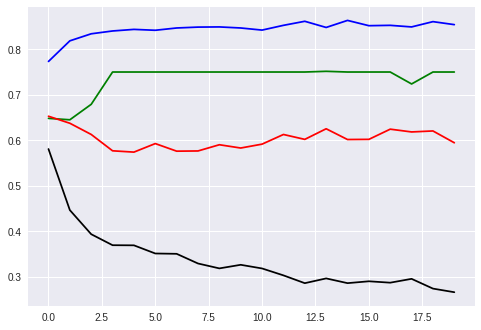

In [0]:
plt.figure(0)
plt.plot(hist.history['acc'],'b')
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()